# Projeto 1

* Encontrar medidas de tendência central para as colunas "points" e "price".
* Encontrar medidas de dispersão para as colunas "points" e "price".
* Obter a assimetria e curtose para a colunas "points".
* Obter o Z-Score para a coluna "points".
* Obter IQR para a colunas "points".

### Encontrar medidas de tendência central para as colunas "points" e "price".

- Média, Mediana e Moda

In [1]:
import pandas as pd
df = pd.read_csv('dataset/winemag-data_first150k.csv')

In [2]:
df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [9]:
info = df.describe()
round(info.loc[['mean', '50%'], ["points", "price"]], 2)

,points,price
mean,87.89,33.13
50%,88.00,24.00


In [16]:
df['points'].mode()[0]

87

In [18]:
# moda
print(f"Moda para a coluna points: {df['points'].mode()[0]}")
print(f"Moda para a coluna price: {df['price'].mode()[0]}")

Moda para a coluna points: 87
Moda para a coluna price: 20.0


### Encontrar medidas de dispersão para as colunas "points" e "price".

In [26]:
print(f"Variância para a coluna points: {round(df['points'].var(), 2)}")
print(f"Desvio Padrão para a coluna points: {round(df['points'].std(), 2)}")
print(40*'-')
print(f"Variância para a coluna price: {round(df['price'].var(), 2)}")
print(f"Desvio Padrão para a coluna price: {round(df['price'].std(), 2)}")

Variância para a coluna points: 10.38
Desvio Padrão para a coluna points: 3.22
----------------------------------------
Variância para a coluna price: 1319.33
Desvio Padrão para a coluna price: 36.32


In [21]:
df["points"].std()

3.22239175898376

### Obter a assimetria e curtose para a colunas "points".

- Nota-se que pela distribuição abaixo, ela possui pouca simetria. Então deve ter uma skewness próxima a zero.
- Enquanto uma kurtosis próxima a três.


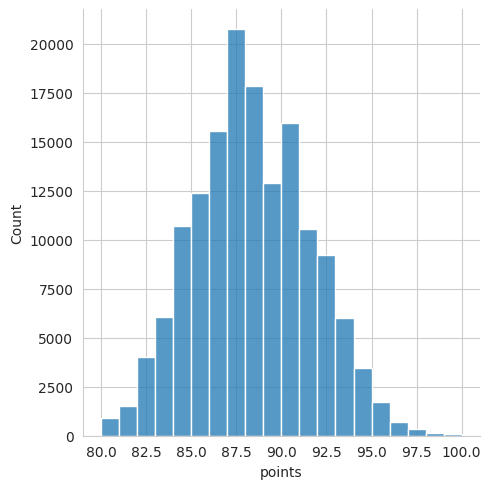

In [38]:
# plotando a distribuição de frequência

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.displot(df['points'], bins=20, kde=False);

In [27]:
from scipy.stats import kurtosis, skew

kurtosis(df["points"], fisher=False)

-0.2864463416644991

- O valor negativo de kurtosis indica que a distribuição tem caudas mais leves do que a distribuição normal padrão. Isso significa que há uma menor probabilidade de ocorrerem valores extremos em comparação com uma distribuição normal.

In [39]:
skew(df["points"])

0.14283121423675518

- Uma skewness próxima a zero, mostra que a distribuição é aproximadamente simétrica. Com a distribuição da cauda esquerda sendo semelhante à cauda direita.

### Obter o Z-Score para a coluna "points".

- A padronização dos dados é usado para obter uma nova distribuição com média igual a 0 e desvio padrão igual a 1.

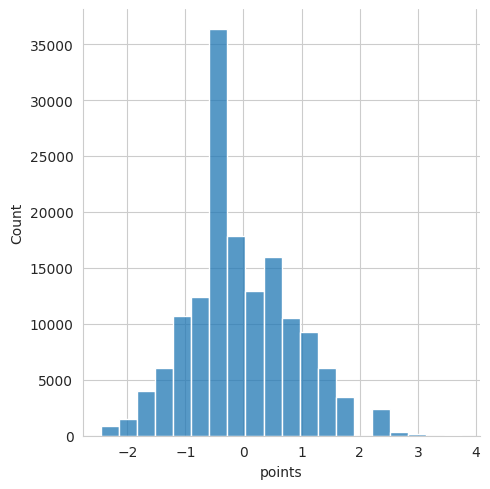

In [45]:
from scipy.stats import zscore

z_points = zscore(df["points"])
sns.displot(z_points, bins=20);

In [49]:
z_points.mean(), z_points.std()

(-1.2549014221441218e-15, 1.0000033128104726)

### Obter IQR para a colunas "points"

- O IQR é o intervalo entre o primeiro e o terceiro quartil. É uma medida de dispersão que é muito utilizada para identificar a variabilidade dos dados e a presença de outliers.

- Abaixo temos um IQR baixo, mostrando que os dados dessa coluna não tem alta variabilidade 

In [50]:
from scipy.stats import iqr

iqr(df["points"])

4.0